# 3 Activation Functions and Vanishing Gradient

The purpose of this task is to get familiar with different activation functions commonly used in artificial neural networks, as well as with some particular problems associated with some of the functions. We will mostly use the common libraries that you have learned to work with in previous assignments for this task.

In [2]:
# Basic import packages. You can add other packages as needed.
import numpy as np
import matplotlib.pyplot as plt
import math

%matplotlib inline

## 3.1 Activation Functions
Your first task will be to give a brief overview of the most popular activation functions used in machine learning, both in terms of mathematical definition and plotting. 

_As usual, for all plots you will produce, keep in mind to add title, proper axis ticks, and axis labels to the plots and make sure they're readable and comprehensible. Whenever you have to plot two different lines, please use different colors for them and add a legend to the plot._

### 3.1.1 Logistic function
The logistic function is one particular Sigmoid activation function. Given some neuron input $x$, it is defined by the formula $$f(x) = \frac{1}{1+e^{-x}}$$

1.) Implement a python function that calculates the logistic function, then

2.) implement the derivative of the logistic function (either you look it up online or you try to derive the equation yourself), and finally

3.) write a function that plots both the logistic function $f(x)$ as well as its derivative/gradient $\frac{\partial f(x)}{\partial x}$ for the some given interval of input values, denoted by the lower bound $x_{\text{min}}$ and the upper bound $x_{\text{max}}$. As an example, given the function call ```plot_logistic(-8, 8)```, we want to plot the function and its gradient for the interval $x \in \{-8, 8\}$. Use the third code box below to test your plots against different combinations of input.

In [3]:
def logistic(x):
    result = 1 / (1 + pow(math.e, -x))
    return result

In [4]:
def logistic_grad(x):
    f_x = logistic(x)
    result = f_x * (1 - f_x)
    return result

In [14]:
def plot_logistic(x_min, x_max):
    x_values = np.linspace(x_min, x_max + 1, num=100)
    y_values = [logistic(x) for x in x_values]
    grad_values = [logistic_grad(x) for x in x_values]
    plt.figure(1)
    plt.plot(x_values, y_values, label='Logistic')
    plt.plot(x_values, grad_values, label='Logistic Gradient')
    plt.legend()
    plt.show()


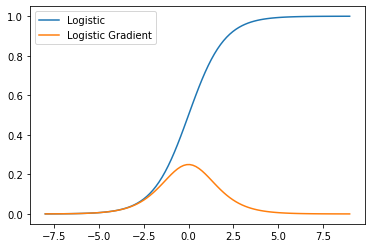

In [15]:
# Use this function call to test your code for different interval boundaries.
plot_logistic(-8, 8)

### 3.1.2 Hyperbolic tangent

The hyperbolic tangent $(tanh)$ is another type of Sigmoid activation function. Given some neuron input $x$, it is defined by the formula $$f(x) = tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$$

1.) Implement a python function that calculates the hyperbolic tangent, then

2.) implement the derivative of the hyperbolic tangent (either you look it up online or you try to derive the equation yourself), and finally

3.) write a function that plots both the hyperbolic tangent $f(x)$ as well as its derivative/gradient $\frac{\partial f(x)}{\partial x}$ for the some given interval of input values, denoted by the lower bound $x_{\text{min}}$ and the upper bound $x_{\text{max}}$. As an example, given the function call ```plot_tanh(-8, 8)```, we want to plot the function and its gradient for the interval $x \in \{-8, 8\}$. Use the third code box below to test your plots against different combinations of input.

In [16]:
def tanh(x):
    pow_e_x = pow(math.e, x)
    pow_e_neg_x = pow(math.e, -x)
    result = (pow_e_x - pow_e_neg_x) / (pow_e_x + pow_e_neg_x)
    return result

In [17]:
def tanh_grad(x):
    # = 1 / cosh^2(x)
    pow_e_x = pow(math.e, x)
    pow_e_neg_x = pow(math.e, -x)
    result = 4 / ( (pow_e_x + pow_e_neg_x) * (pow_e_x + pow_e_neg_x) )
    return result

In [18]:
def plot_tanh(x_min, x_max):
    x_values = np.linspace(x_min, x_max + 1, num=100)
    y_values = [tanh(x) for x in x_values]
    grad_values = [tanh_grad(x) for x in x_values]
    plt.figure(1)
    plt.plot(x_values, y_values, label='Hyperbolic Tangent')
    plt.plot(x_values, grad_values, label='Hyperbolic Tangent Gradient')
    plt.legend()
    plt.show()

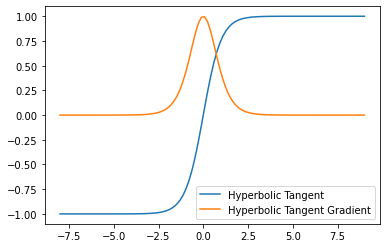

In [19]:
# Use this function call to test your code for different interval boundaries.
plot_tanh(-8, 8)

### 3.1.3 Rectified Linear Unit
The Rectified Linear Unit (ReLU) is another well-known actiavtion function used in neural networks. Given some neuron input $x$, it is defined by the formula 

$$f(x) = \begin{cases}
      x, & \text{if} \; x>0 \\
      0, & \text{otherwise}
    \end{cases}$$

1.) Implement a python function that calculates the ReLU function, then

2.) implement the derivative of the ReLU function (either you look it up online or you try to derive the equation yourself), and finally

3.) write a function that plots both the ReLU function $f(x)$ as well as its derivative/gradient $\frac{\partial f(x)}{\partial x}$ for the some given interval of input values, denoted by the lower bound $x_{\text{min}}$ and the upper bound $x_{\text{max}}$. As an example, given the function call ```plot_relu(-8, 8)```, we want to plot the function and its gradient for the interval $x \in \{-8, 8\}$. Use the third code box below to test your plots against different combinations of input.

In [21]:
def relu(x):
    result = x if x > 0 else 0
    return result

In [20]:
def relu_grad(x):
    # set f'(0) = 0 allthough it is actually undefined
    result = 0 if x < 0 else 1
    return result

In [22]:
def plot_relu(x_min, x_max):
    x_values = np.linspace(x_min, x_max + 1, num=100)
    y_values = [relu(x) for x in x_values]
    grad_values = [relu_grad(x) for x in x_values]
    plt.figure(1)
    plt.plot(x_values, y_values, label='Rectified Linear Unit')
    plt.plot(x_values, grad_values, label='Rectified Linear Unit Gradient')
    plt.legend()
    plt.show()

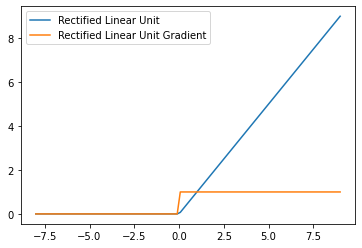

In [23]:
# Use this function call to test your code for different interval boundaries.
plot_relu(-8, 8)

## 3.2 Vanishing Gradients

Explain the problem of **vanishing gradients** in your own words by taking a look at the plots you just generated above and answering the questions below: 

- When can vanishing gradients occur?
- Assuming our input values are positive, which activation functions are prone to vanishing gradients, and why?
- Which layers in a feed-forward neural network are most affected by vanishing gradients?
- Considering the causes of vanishing gradients, what could instead cause the **exploding gradients** problem in neural networks?

**ANSWER:**

Vanishing gradients occur when the gradient that is used to update the weights during backpropagation becomes very small and the learning process gets very slow or even stuck at that position.
With these cases, the logistic and hyperbolic tangent functions are susceptible to the vanishing gradient problem because their derivative tends towards zero the higher the x value is. The Rectified Linear Unit does not have this problem as its derivative always stays at 1 for positive inputs, regardless of its value.
In a feed forward neural network the early layers are most affected by vanishing gradients because their error values depend on all gradients that lie in further layers. In this case many of the increasingly small gradients are calculated together such that their vanishing effect increases exponentially.
Exploding gradients is the opposite problem where gradients become increasingly large such that they fail to represent the desired learning process. This is caused, for example, by gradients that don't change with input value as in the derivative of the ReLU function.